#SME0806 - Projeto Final

#Agrupamento multivariado do Old Faithful com modelos de mistura gaussiana

Ada Maris Pereira Mário

##Libraries

In [ ]:
install.packages("mclust")
library(mclust)
library(ggplot2)
library(dplyr)
library(cluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##Dataset

In [ ]:
data(faithful)
head(faithful)

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55


##EDA

###Estatísticas descritivas

In [ ]:
# Resumo estatístico dos dados
summary(faithful)

   eruptions        waiting    
 Min.   :1.600   Min.   :43.0  
 1st Qu.:2.163   1st Qu.:58.0  
 Median :4.000   Median :76.0  
 Mean   :3.488   Mean   :70.9  
 3rd Qu.:4.454   3rd Qu.:82.0  
 Max.   :5.100   Max.   :96.0  

In [ ]:
# Estatísticas descritivas
stat_desc <- faithful %>%
  summarise(
    eruptions_mean = mean(eruptions),
    eruptions_sd = sd(eruptions),
    eruptions_min = min(eruptions),
    eruptions_max = max(eruptions),
    waiting_mean = mean(waiting),
    waiting_sd = sd(waiting),
    waiting_min = min(waiting),
    waiting_max = max(waiting)
  )

print(stat_desc)


  eruptions_mean eruptions_sd eruptions_min eruptions_max waiting_mean
1       3.487783     1.141371           1.6           5.1     70.89706
  waiting_sd waiting_min waiting_max
1   13.59497          43          96


###Distribuição dos dados - Histogramas e Scatter plots

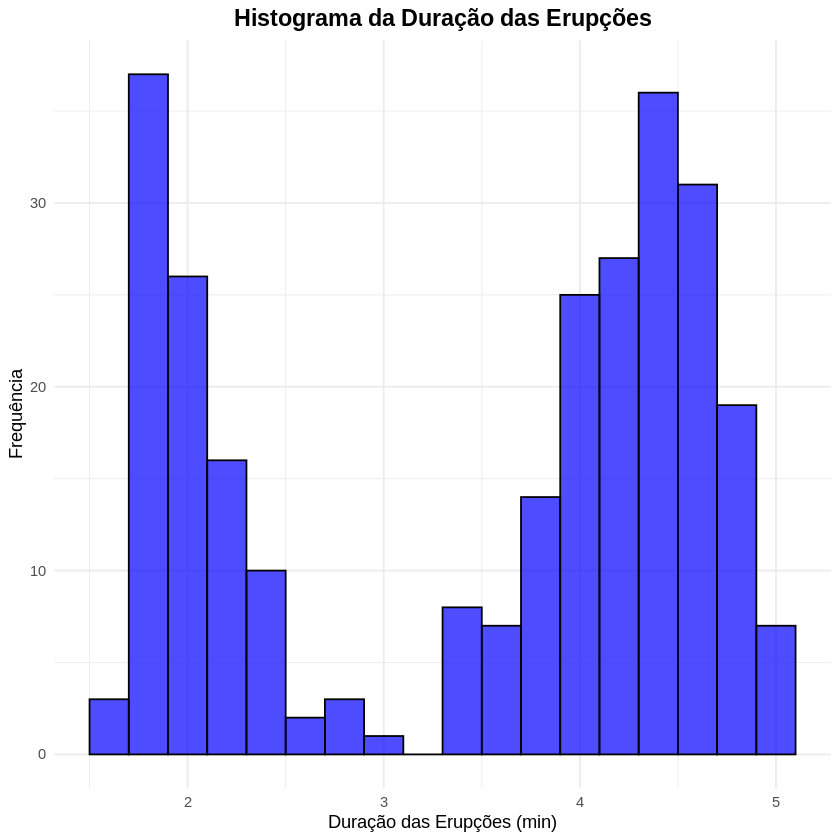

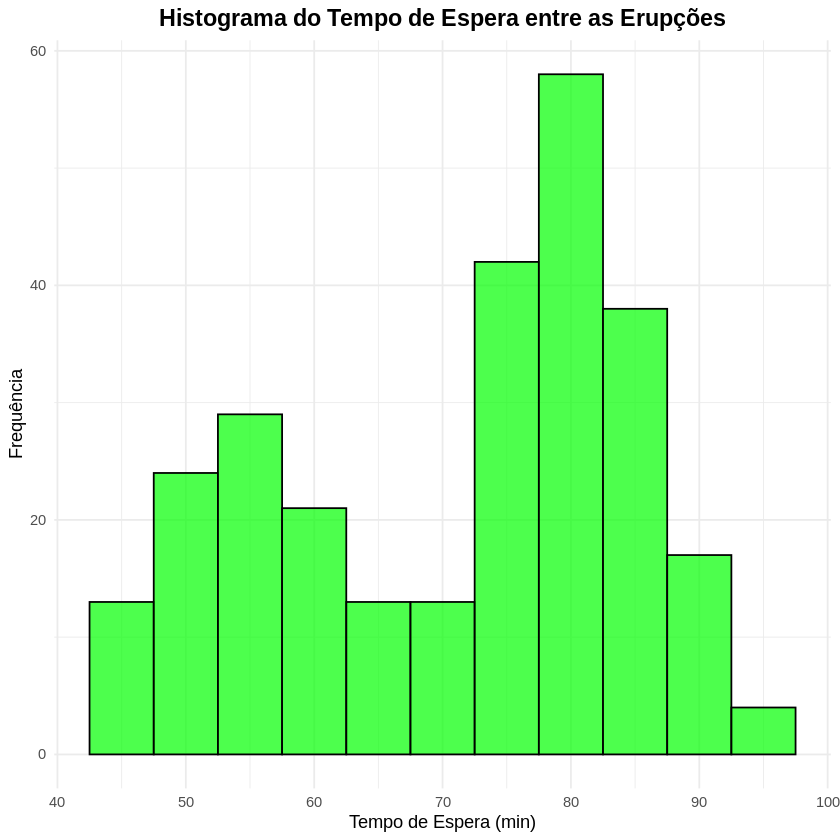

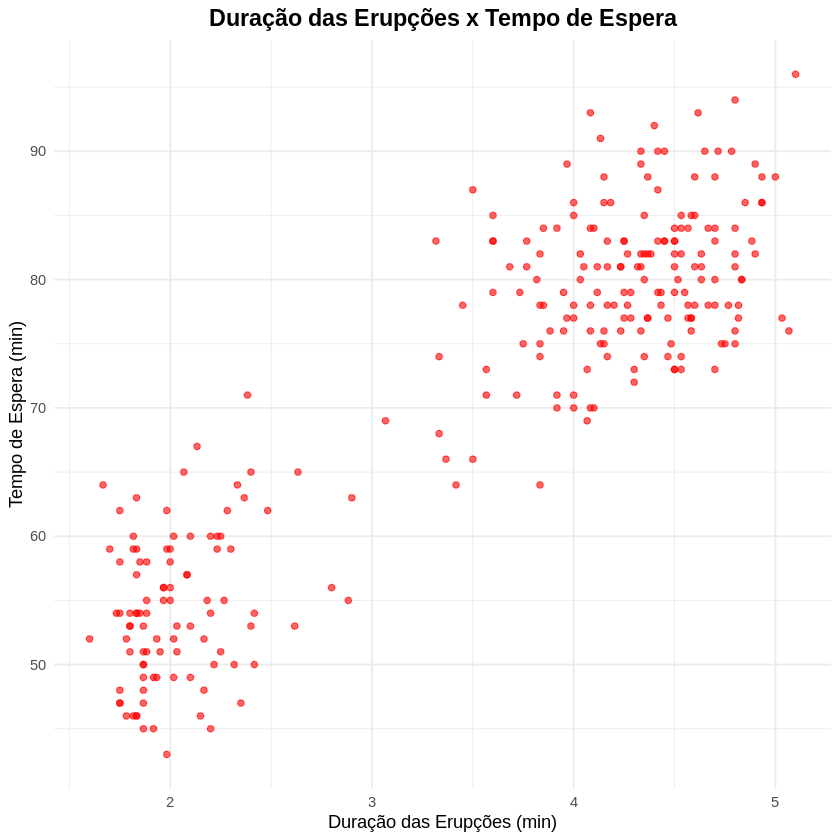

In [ ]:
# Histograma da duração das erupções
ggplot(faithful, aes(x = eruptions)) +
  geom_histogram(binwidth = 0.2, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Histograma da Duração das Erupções", x = "Duração das Erupções (min)", y = "Frequência") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold")
  )

# Histograma do tempo de espera entre as erupções
ggplot(faithful, aes(x = waiting)) +
  geom_histogram(binwidth = 5, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma do Tempo de Espera entre as Erupções", x = "Tempo de Espera (min)", y = "Frequência") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold")
  )

# Scatter plot entre duração das erupções e tempo de espera
ggplot(faithful, aes(x = eruptions, y = waiting)) +
  geom_point(color = "red", alpha = 0.6) +
  labs(title = "Duração das Erupções x Tempo de Espera", x = "Duração das Erupções (min)", y = "Tempo de Espera (min)") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold")
  )

In [ ]:
# Cálculo da correlação entre duração das erupções e tempo de espera
correlation <- cor(faithful$eruptions, faithful$waiting)
cat("Correlação entre Duração das Erupções e Tempo de Espera:", correlation, "\n")

Correlação entre Duração das Erupções e Tempo de Espera: 0.9008112 


###Análise de ruídos

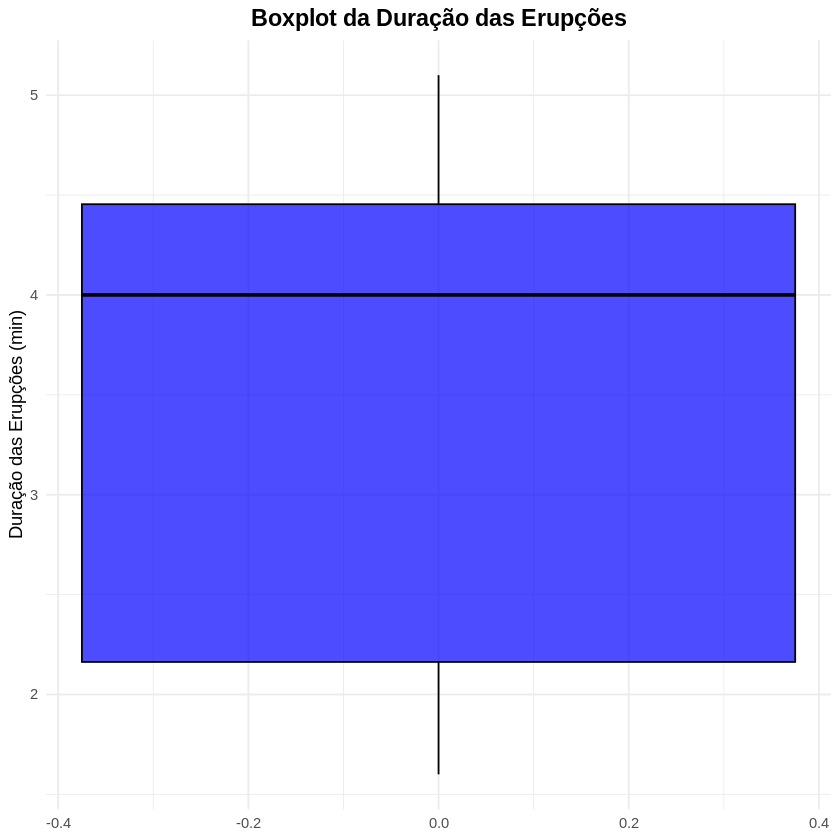

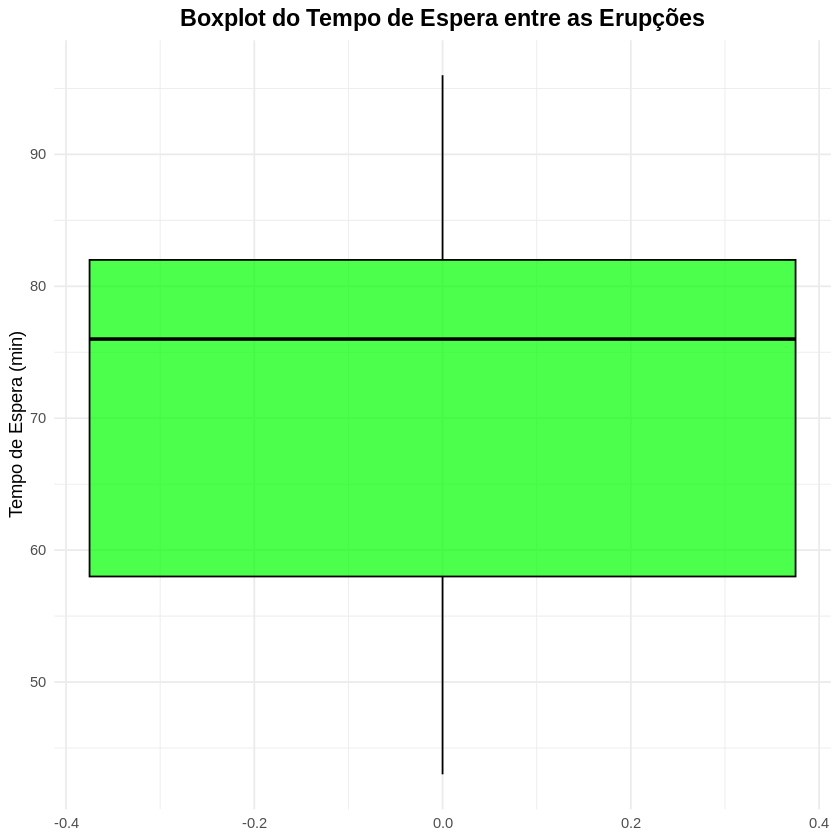

In [ ]:
# Boxplot da duração das erupções
ggplot(faithful, aes(y = eruptions)) +
  geom_boxplot(fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Boxplot da Duração das Erupções", y = "Duração das Erupções (min)") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold")
  )

# Boxplot do tempo de espera entre as erupções
ggplot(faithful, aes(y = waiting)) +
  geom_boxplot(fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Boxplot do Tempo de Espera entre as Erupções", y = "Tempo de Espera (min)") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold")
  )


In [ ]:
# Função para identificar outliers com a regra do IQR
identify_outliers <- function(data) {
  Q1 <- quantile(data, 0.25)
  Q3 <- quantile(data, 0.75)
  IQR <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  outliers <- which(data < lower_bound | data > upper_bound)
  return(outliers)
}

# Identificando outliers
outliers_eruptions <- identify_outliers(faithful$eruptions)
outliers_waiting <- identify_outliers(faithful$waiting)

# Exibindo outliers
print(outliers_eruptions)
print(outliers_waiting)


integer(0)
integer(0)


##Model fitting - 3 clusters



In [ ]:
gmm_model <- Mclust(faithful)
summary(gmm_model)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEE (ellipsoidal, equal volume, shape and orientation) model with 3
components: 

 log-likelihood   n df       BIC       ICL
      -1126.326 272 11 -2314.316 -2357.824

Clustering table:
  1   2   3 
 40  97 135 

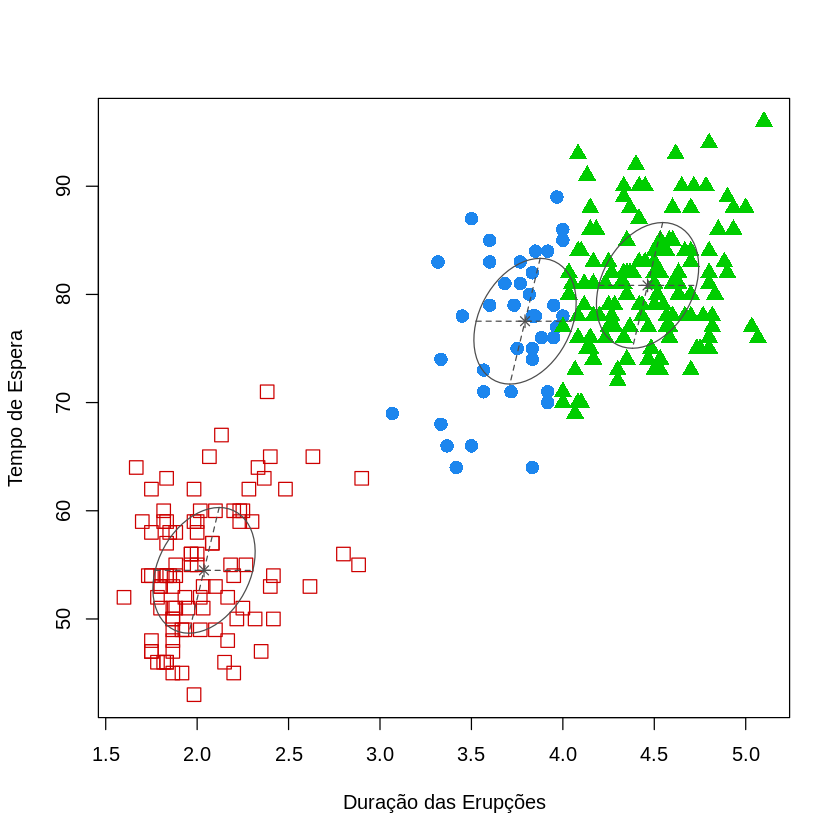

In [ ]:
# Visualização dos clusters e suas médias
plot(gmm_model, what = "classification", pch = 20, cex = 1.5,
     xlab = "Duração das Erupções", ylab = "Tempo de Espera",
     main = "Clusterização pelo Modelo de Mistura Gaussiana - 3 clusters")
points(gmm_model$parameters$mean, col = 1:3, pch = 8, cex = 2)

In [ ]:
# Visualizar os parâmetros estimados do modelo
print(gmm_model$parameters)

$pro
[1] 0.1656784 0.3563696 0.4779520

$mean
               [,1]      [,2]      [,3]
eruptions  3.793066  2.037596  4.463245
waiting   77.521051 54.491158 80.833439

$variance
$variance$modelName
[1] "EEE"

$variance$d
[1] 2

$variance$G
[1] 3

$variance$sigma
, , 1

           eruptions    waiting
eruptions 0.07825448  0.4801979
waiting   0.48019785 33.7671464

, , 2

           eruptions    waiting
eruptions 0.07825448  0.4801979
waiting   0.48019785 33.7671464

, , 3

           eruptions    waiting
eruptions 0.07825448  0.4801979
waiting   0.48019785 33.7671464


$variance$Sigma
           eruptions    waiting
eruptions 0.07825448  0.4801979
waiting   0.48019785 33.7671464

$variance$cholSigma
          eruptions   waiting
eruptions  -0.27974 -1.716586
waiting     0.00000  5.551619




In [ ]:
# Analisar a probabilidade de cada ponto pertencer a cada cluster
posterior_probs <- gmm_model$z
head(posterior_probs)

1,9.718036e-01,1.420275e-08,2.819634e-02
2,8.604351e-13,1.000000e+00,7.571495e-21
3,9.967399e-01,2.175555e-05,3.238336e-03
4,3.140299e-07,9.999997e-01,1.494469e-13
5,1.168409e-02,1.302547e-19,9.883159e-01
6,3.092711e-03,9.969070e-01,3.390998e-07


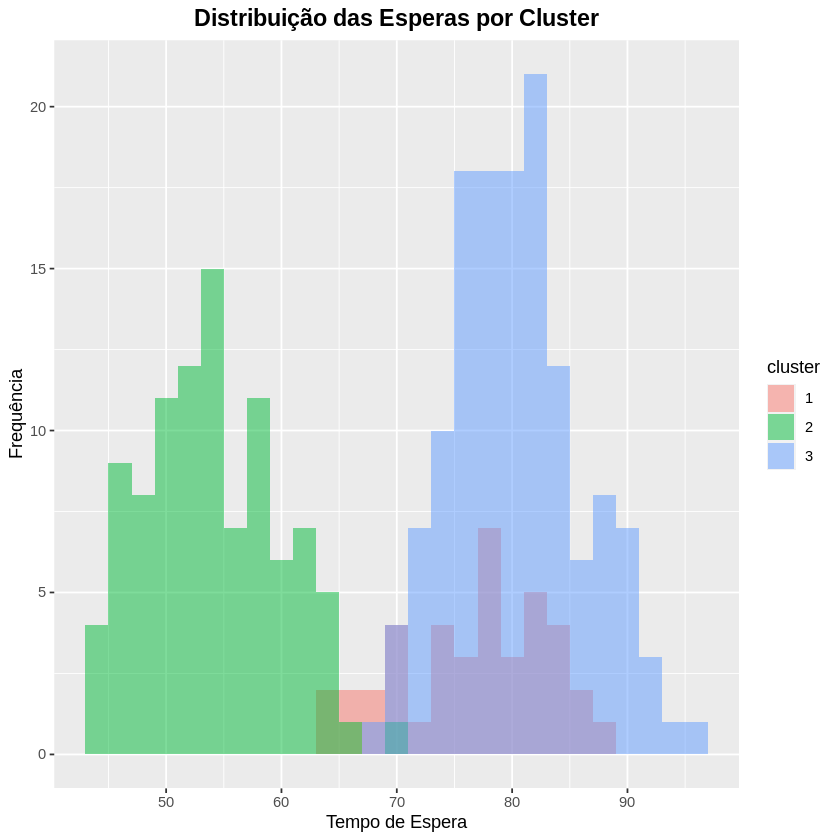

In [ ]:
# Histograma segmentado por clusters
library(ggplot2)
faithful$cluster <- as.factor(gmm_model$classification)
ggplot(faithful, aes(x = waiting, fill = cluster)) +
    geom_histogram(binwidth = 2, alpha = 0.5, position = "identity") +
    labs(title = "Distribuição das Esperas por Cluster", x = "Tempo de Espera", y = "Frequência") +
    theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold")
  )

##Model fitting - 2 clusters


In [ ]:
# Reajustando o modelo GMM forçando 2 clusters
data(faithful)
gmm_model_2 <- Mclust(faithful, G = 2)
summary(gmm_model_2)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVE (ellipsoidal, equal orientation) model with 2 components: 

 log-likelihood   n df       BIC       ICL
      -1132.187 272 10 -2320.433 -2320.763

Clustering table:
  1   2 
175  97 

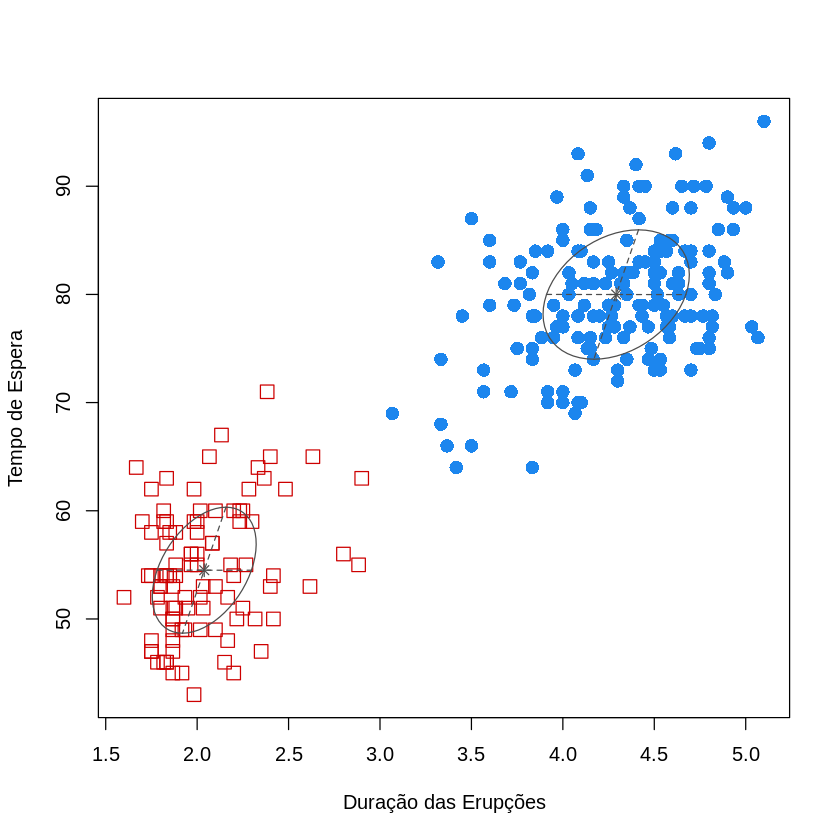

In [ ]:
# Visualização dos dados com 2 clusters
plot(gmm_model_2, what = "classification", pch = 20, cex = 1.5,
     xlab = "Duração das Erupções", ylab = "Tempo de Espera",
     main = "Clusterização pelo Modelo de Mistura Gaussiana - 2 clusters")
points(gmm_model$parameters$mean, col = 1:3, pch = 8, cex = 2)

In [ ]:
# Visualizar os parâmetros estimados do modelo
print(gmm_model_2$parameters)

$pro
[1] 0.6431778 0.3568222

$mean
               [,1]      [,2]
eruptions  4.291633  2.038831
waiting   79.990255 54.506423

$variance
$variance$modelName
[1] "VVE"

$variance$d
[1] 2

$variance$G
[1] 2

$variance$sigma
, , 1

          eruptions    waiting
eruptions 0.1600175  0.7272673
waiting   0.7272673 35.7585543

, , 2

           eruptions    waiting
eruptions 0.08069286  0.6912995
waiting   0.69129952 33.9186657


$variance$scale
[1] 2.278833 1.503030

$variance$shape
            [,1]        [,2]
[1,]  0.06370186  0.04429433
[2,] 15.69812831 22.57625107

$variance$orientation
            eruptions    waiting
eruptions  0.99979155 0.02041692
waiting   -0.02041692 0.99979155


$Vinv
NULL



In [ ]:
# Analisar a probabilidade de cada ponto pertencer a cada cluster
posterior_probs <- gmm_model_2$z
head(posterior_probs)

1,9.999999e-01,1.222878e-07
2,2.416119e-10,1.000000e+00
3,9.998637e-01,1.362923e-04
4,2.893721e-06,9.999971e-01
5,1.000000e+00,5.245656e-18
6,2.185249e-03,9.978148e-01


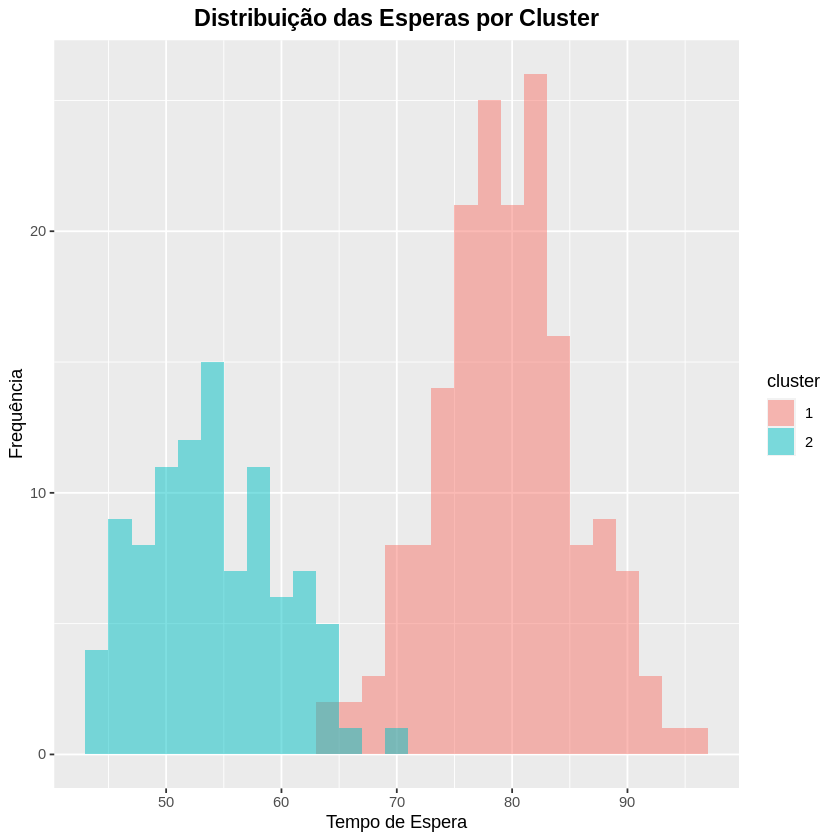

In [ ]:
# Histograma segmentado por clusters
faithful$cluster <- as.factor(gmm_model_2$classification)
ggplot(faithful, aes(x = waiting, fill = cluster)) +
    geom_histogram(binwidth = 2, alpha = 0.5, position = "identity") +
    labs(title = "Distribuição das Esperas por Cluster", x = "Tempo de Espera", y = "Frequência") +
    theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold")
  )

##Model validation

In [ ]:
# Função para calcular o Silhouette Score
calculate_silhouette <- function(data, model) {
  clusters <- model$classification
  silhouette_score <- silhouette(clusters, dist(data))
  mean(silhouette_score[, 3])
}

# Calculando o Silhouette Score para o modelo de 3 clusters
silhouette_score_3 <- calculate_silhouette(faithful, gmm_model)
silhouette_score_3

# Calculando o Silhouette Score para o modelo de 2 clusters
gmm_model_2 <- Mclust(faithful, G = 2)
silhouette_score_2 <- calculate_silhouette(faithful, gmm_model_2)
silhouette_score_2


[1] 0.2977585

[1] 0.709633

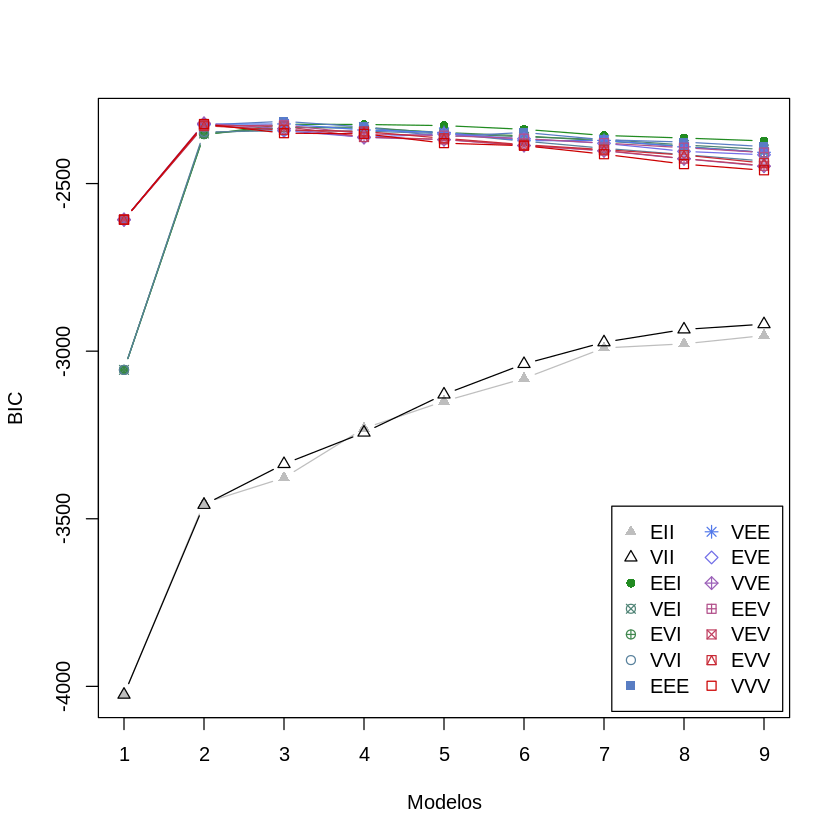

In [ ]:
data(faithful)

# Calcula o BIC para diferentes modelos possíveis
BIC_values <- mclustBIC(faithful)

# Plota o histórico de BIC's para cada modelo
plot(BIC_values, type = "l",
     ylab = "BIC",
     xlab = "Modelos")

lines(BIC_values, type = "l")

In [ ]:
BIC_values

Bayesian Information Criterion (BIC): 
        EII       VII       EEI       VEI       EVI       VVI       EEE
1 -4024.721 -4024.721 -3055.835 -3055.835 -3055.835 -3055.835 -2607.623
2 -3452.998 -3458.305 -2354.601 -2350.607 -2352.618 -2346.065 -2325.220
3 -3377.701 -3336.598 -2323.014 -2332.687 -2332.205 -2342.366 -2314.316
4 -3230.264 -3242.826 -2323.673 -2331.284 -2334.749 -2343.486 -2331.223
5 -3149.394 -3129.080 -2327.059 -2350.230 -2347.564 -2351.017 -2360.659
6 -3081.414 -3038.171 -2338.205 -2360.578 -2357.660 -2373.469 -2347.352
7 -2990.367 -2973.374 -2356.454 -2368.513 -2372.851 -2394.696 -2369.330
8 -2978.100 -2935.082 -2364.140 -2384.740 -2389.064 -2413.705 -2376.104
9 -2953.359 -2919.415 -2372.790 -2398.223 -2407.224 -2432.708 -2389.609
        VEE       EVE       VVE       EEV       VEV       EVV       VVV
1 -2607.623 -2607.623 -2607.623 -2607.623 -2607.623 -2607.623 -2607.623
2 -2322.972 -2324.273 -2320.433 -2329.115 -2325.416 -2327.598 -2322.192
3 -2322.103 -2342.319 -23

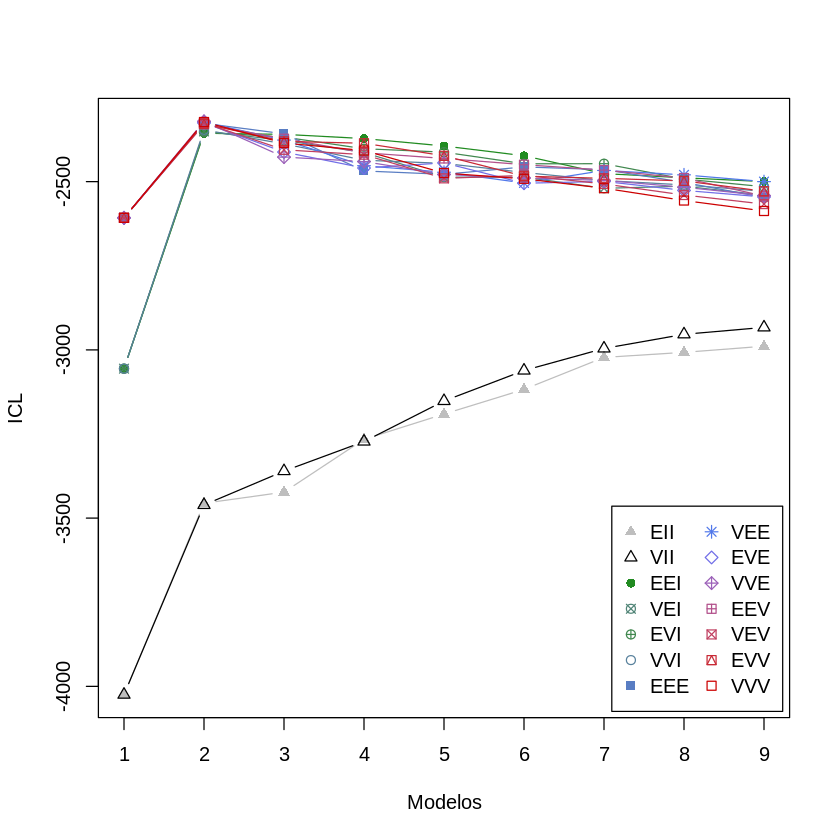

In [ ]:
# Calcula o ICL para diferentes modelos possíveis
ICL_values <- mclustICL(faithful)


# Plota o histórico de ICL's para cada modelo
plot(ICL_values, type = "l",
     ylab = "ICL",
     xlab = "Modelos")

# Optionally, add a line connecting the points
lines(ICL_values, type = "l")

In [ ]:
mclustICL(faithful)

Integrated Complete-data Likelihood (ICL) criterion: 
        EII       VII       EEI       VEI       EVI       VVI       EEE
1 -4024.721 -4024.721 -3055.835 -3055.835 -3055.835 -3055.835 -2607.623
2 -3455.814 -3460.903 -2356.273 -2350.728 -2353.254 -2346.161 -2326.710
3 -3422.758 -3360.264 -2359.458 -2377.306 -2367.537 -2387.744 -2357.824
4 -3265.796 -3272.457 -2371.996 -2413.391 -2402.189 -2436.318 -2468.261
5 -3190.702 -3151.887 -2394.022 -2486.702 -2412.390 -2445.754 -2478.220
6 -3117.441 -3061.335 -2423.024 -2486.795 -2446.878 -2472.624 -2456.239
7 -3022.312 -2995.759 -2476.203 -2519.776 -2446.706 -2496.750 -2464.343
8 -3007.364 -2953.728 -2488.504 -2513.529 -2492.319 -2509.675 -2502.177
9 -2989.092 -2933.144 -2499.876 -2540.432 -2515.042 -2528.602 -2547.111
        VEE       EVE       VVE       EEV       VEV       EVV       VVV
1 -2607.623 -2607.623 -2607.623 -2607.623 -2607.623 -2607.623 -2607.623
2 -2323.396 -2325.768 -2320.763 -2330.000 -2325.727 -2328.163 -2322.697
3 -2376.46

##EM algorithm

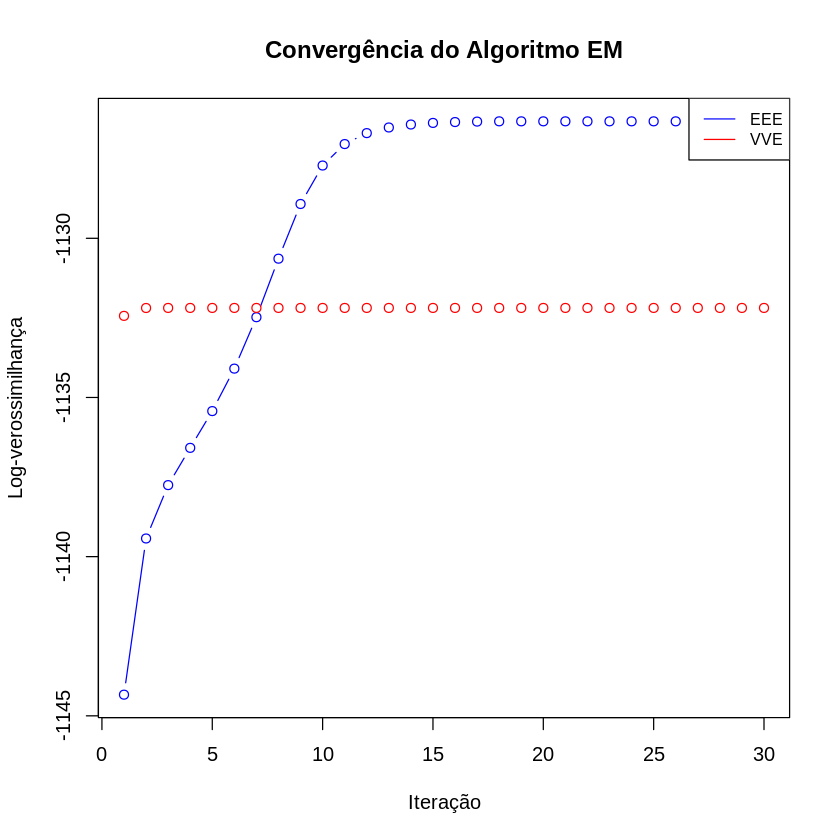

In [ ]:
# Função para ajustar o modelo EEE e registrar a log-verossimilhança
em_convergence_EEE <- function(X, G, max_iter = 30) {
  n <- nrow(X)
  d <- ncol(X)

  # Inicializando os parametros
  model <- Mclust(X, G = G, modelNames = "EEE")
  max_iter <- ifelse(is.null(model$iter), max_iter, model$iter)
  log_likelihood <- numeric(max_iter)

  for (i in 1:max_iter) {
    model <- Mclust(X, G = G, modelNames = "EEE", control = emControl(itmax = i))
    log_likelihood[i] <- model$loglik
  }

  return(log_likelihood)
}

# Função para ajustar o modelo VVE e registrar a log-verossimilhança
em_convergence_VVE <- function(X, G, max_iter = 30) {
  n <- nrow(X)
  d <- ncol(X)

  # Inicializando os parametros
  model <- Mclust(X, G = G, modelNames = "VVE")
  max_iter <- ifelse(is.null(model$iter), max_iter, model$iter)
  log_likelihood <- numeric(max_iter)

  for (i in 1:max_iter) {
    model <- Mclust(X, G = G, modelNames = "VVE", control = emControl(itmax = i))
    log_likelihood[i] <- model$loglik
  }

  return(log_likelihood)
}

# Dados do Old Faithful
X <- faithful[, c("eruptions", "waiting")]

# Aplicando as funções para obter as log-verossimilhanças
log_likelihood_EEE <- em_convergence_EEE(X, 3)
log_likelihood_VVE <- em_convergence_VVE(X, 2)

# Plotando a convergência dos dois modelos
plot(log_likelihood_EEE, type = "b", col = "blue", ylim = range(c(log_likelihood_EEE, log_likelihood_VVE)),
     main = "Convergência do Algoritmo EM", xlab = "Iteração", ylab = "Log-verossimilhança")
lines(log_likelihood_VVE, type = "b", col = "red")
legend("topright", legend = c("EEE", "VVE"), col = c("blue", "red"), lty = 1, cex = 0.8)
